#Load the Dataset

In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/content/drive/MyDrive/DBSCAN/2019(H).csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data
print(data.head())


   Unnamed: 0  X.1                 time         X      t_i_1      t_i_2  \
0           1    1  2019-06-24 19:00:00  251749.0  30.544837  30.718750   
1           2    2  2019-06-24 20:00:00  251790.5  30.429688  30.663542   
2           3    3  2019-06-24 21:00:00  251850.5  30.477604  30.734896   
3           4    4  2019-06-24 22:00:00  251910.5  30.102083  30.339583   
4           5    5  2019-06-24 23:00:00  251970.5  29.490625  29.676562   

       t_i_3      t_i_4  t_i_5        t_o  ...  died.last  died.next  \
0  28.176630  27.944293    NaN  23.561141  ...        NaN        NaN   
1  27.407292  27.242708    NaN  21.786979  ...        NaN        NaN   
2  26.690625  26.569792    NaN  20.643750  ...        NaN        NaN   
3  25.789062  25.478125    NaN  19.376562  ...        NaN        NaN   
4  24.751562  24.357813    NaN  18.694792  ...        NaN        NaN   

   died.last.dif  died.next.dif  swarming.last  swarming.next  \
0            NaN            NaN            NaN     

#Data Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              436 non-null    int64  
 1   X.1                     436 non-null    int64  
 2   time                    436 non-null    object 
 3   X                       436 non-null    float64
 4   t_i_1                   413 non-null    float64
 5   t_i_2                   413 non-null    float64
 6   t_i_3                   413 non-null    float64
 7   t_i_4                   413 non-null    float64
 8   t_i_5                   0 non-null      float64
 9   t_o                     413 non-null    float64
 10  weight_kg               436 non-null    float64
 11  h                       360 non-null    float64
 12  t                       360 non-null    float64
 13  p                       360 non-null    float64
 14  key                     436 non-null    in

In [ ]:
# Select relevant columns for anomaly detection
relevant_columns = ['t_i_1', 't_i_2', 't_i_3', 't_i_4', 't_i_5', 't_o', 'weight_kg', 'h', 't', 'p']
data_relevant = data[relevant_columns]

# Display the first few rows of the cleaned data
print(data_relevant.head())


       t_i_1      t_i_2      t_i_3      t_i_4  t_i_5        t_o  weight_kg  \
0  30.544837  30.718750  28.176630  27.944293    NaN  23.561141  21.809043   
1  30.429688  30.663542  27.407292  27.242708    NaN  21.786979  21.826073   
2  30.477604  30.734896  26.690625  26.569792    NaN  20.643750  21.825468   
3  30.102083  30.339583  25.789062  25.478125    NaN  19.376562  21.823140   
4  29.490625  29.676562  24.751562  24.357813    NaN  18.694792  21.821779   

           h          t            p  
0  44.807017  28.998274  1021.510391  
1  44.409986  27.686469  1021.644608  
2  47.015072  26.503949  1021.758742  
3  48.768120  25.286005  1021.846275  
4  49.419276  24.144687  1021.728075  


In [ ]:
data_relevant.describe()

,t_i_1,t_i_2,t_i_3,t_i_4,t_i_5,t_o,weight_kg,h,t,p
count,413.000000,413.000000,413.000000,413.000000,0.0,413.000000,436.000000,360.000000,360.000000,360.000000
mean,24.494683,24.134921,21.785535,21.792355,NaN,18.833104,21.451711,55.424832,23.450219,1018.225404
std,6.119177,6.507202,6.881987,6.705255,NaN,6.247931,0.999774,12.678703,6.826664,5.510272
min,-0.062500,-0.062500,-0.062500,3.571733,NaN,3.244318,19.734117,26.586948,9.750757,1007.724638
25%,20.356250,19.592188,16.742708,16.799479,NaN,14.220833,20.799663,44.860786,18.137485,1013.856785
50%,25.166146,24.429688,20.794271,20.802604,NaN,17.589583,21.153754,56.229593,22.555925,1017.855324
75%,29.214583,29.012500,26.573958,26.411458,NaN,23.002604,22.203052,65.830922,28.059303,1022.265579
max,36.059896,37.122396,39.404167,39.663542,NaN,36.668750,24.652686,79.441898,41.748370,1029.815433


In [ ]:
data_relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   t_i_1      413 non-null    float64
 1   t_i_2      413 non-null    float64
 2   t_i_3      413 non-null    float64
 3   t_i_4      413 non-null    float64
 4   t_i_5      0 non-null      float64
 5   t_o        413 non-null    float64
 6   weight_kg  436 non-null    float64
 7   h          360 non-null    float64
 8   t          360 non-null    float64
 9   p          360 non-null    float64
dtypes: float64(10)
memory usage: 34.2 KB


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer


# Initialize the mean imputer
mean_imputer = SimpleImputer(strategy='mean')

# Columns to be imputed with mean
mean_impute_cols = ['t_i_1', 't_i_2', 't_i_3', 't_i_4', 't_o', 'weight_kg', 'h', 't', 'p']

# Apply mean imputation
data_relevant[mean_impute_cols] = mean_imputer.fit_transform(data_relevant[mean_impute_cols])

# Display the imputed relevant data
print("Imputed Relevant Data:")
print(data_relevant.head())

# Save the imputed data to a new CSV file
data_relevant.to_csv('imputed_relevant_data.csv', index=False)


Imputed Relevant Data:
       t_i_1      t_i_2      t_i_3      t_i_4  t_i_5        t_o  weight_kg  \
0  30.544837  30.718750  28.176630  27.944293    NaN  23.561141  21.809043   
1  30.429688  30.663542  27.407292  27.242708    NaN  21.786979  21.826073   
2  30.477604  30.734896  26.690625  26.569792    NaN  20.643750  21.825468   
3  30.102083  30.339583  25.789062  25.478125    NaN  19.376562  21.823140   
4  29.490625  29.676562  24.751562  24.357813    NaN  18.694792  21.821779   

           h          t            p  
0  44.807017  28.998274  1021.510391  
1  44.409986  27.686469  1021.644608  
2  47.015072  26.503949  1021.758742  
3  48.768120  25.286005  1021.846275  
4  49.419276  24.144687  1021.728075  


<ipython-input-11-9a130a2f4545>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant[mean_impute_cols] = mean_imputer.fit_transform(data_relevant[mean_impute_cols])


In [ ]:
data_relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   t_i_1      436 non-null    float64
 1   t_i_2      436 non-null    float64
 2   t_i_3      436 non-null    float64
 3   t_i_4      436 non-null    float64
 4   t_i_5      0 non-null      float64
 5   t_o        436 non-null    float64
 6   weight_kg  436 non-null    float64
 7   h          436 non-null    float64
 8   t          436 non-null    float64
 9   p          436 non-null    float64
dtypes: float64(10)
memory usage: 34.2 KB


In [ ]:
# Drop the 't_i_5' column
data_relevant = data_relevant.drop(columns=['t_i_5'])

In [ ]:
data_relevant.describe()

,t_i_1,t_i_2,t_i_3,t_i_4,t_o,weight_kg,h,t,p
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,24.494683,24.134921,21.785535,21.792355,18.833104,21.451711,55.424832,23.450219,1018.225404
std,5.955209,6.332836,6.697578,6.525583,6.080513,0.999774,11.518010,6.201705,5.005824
min,-0.062500,-0.062500,-0.062500,3.571733,3.244318,19.734117,26.586948,9.750757,1007.724638
25%,20.646745,19.900521,17.055729,17.053776,14.333724,20.799663,47.000204,18.909024,1014.526806
50%,24.618854,24.134921,21.546875,21.451302,18.246094,21.153754,55.424832,23.450219,1018.225404
75%,29.008073,28.832319,26.313802,26.153646,22.721484,22.203052,64.343134,27.026025,1021.144575
max,36.059896,37.122396,39.404167,39.663542,36.668750,24.652686,79.441898,41.748370,1029.815433


#Data Visulalization

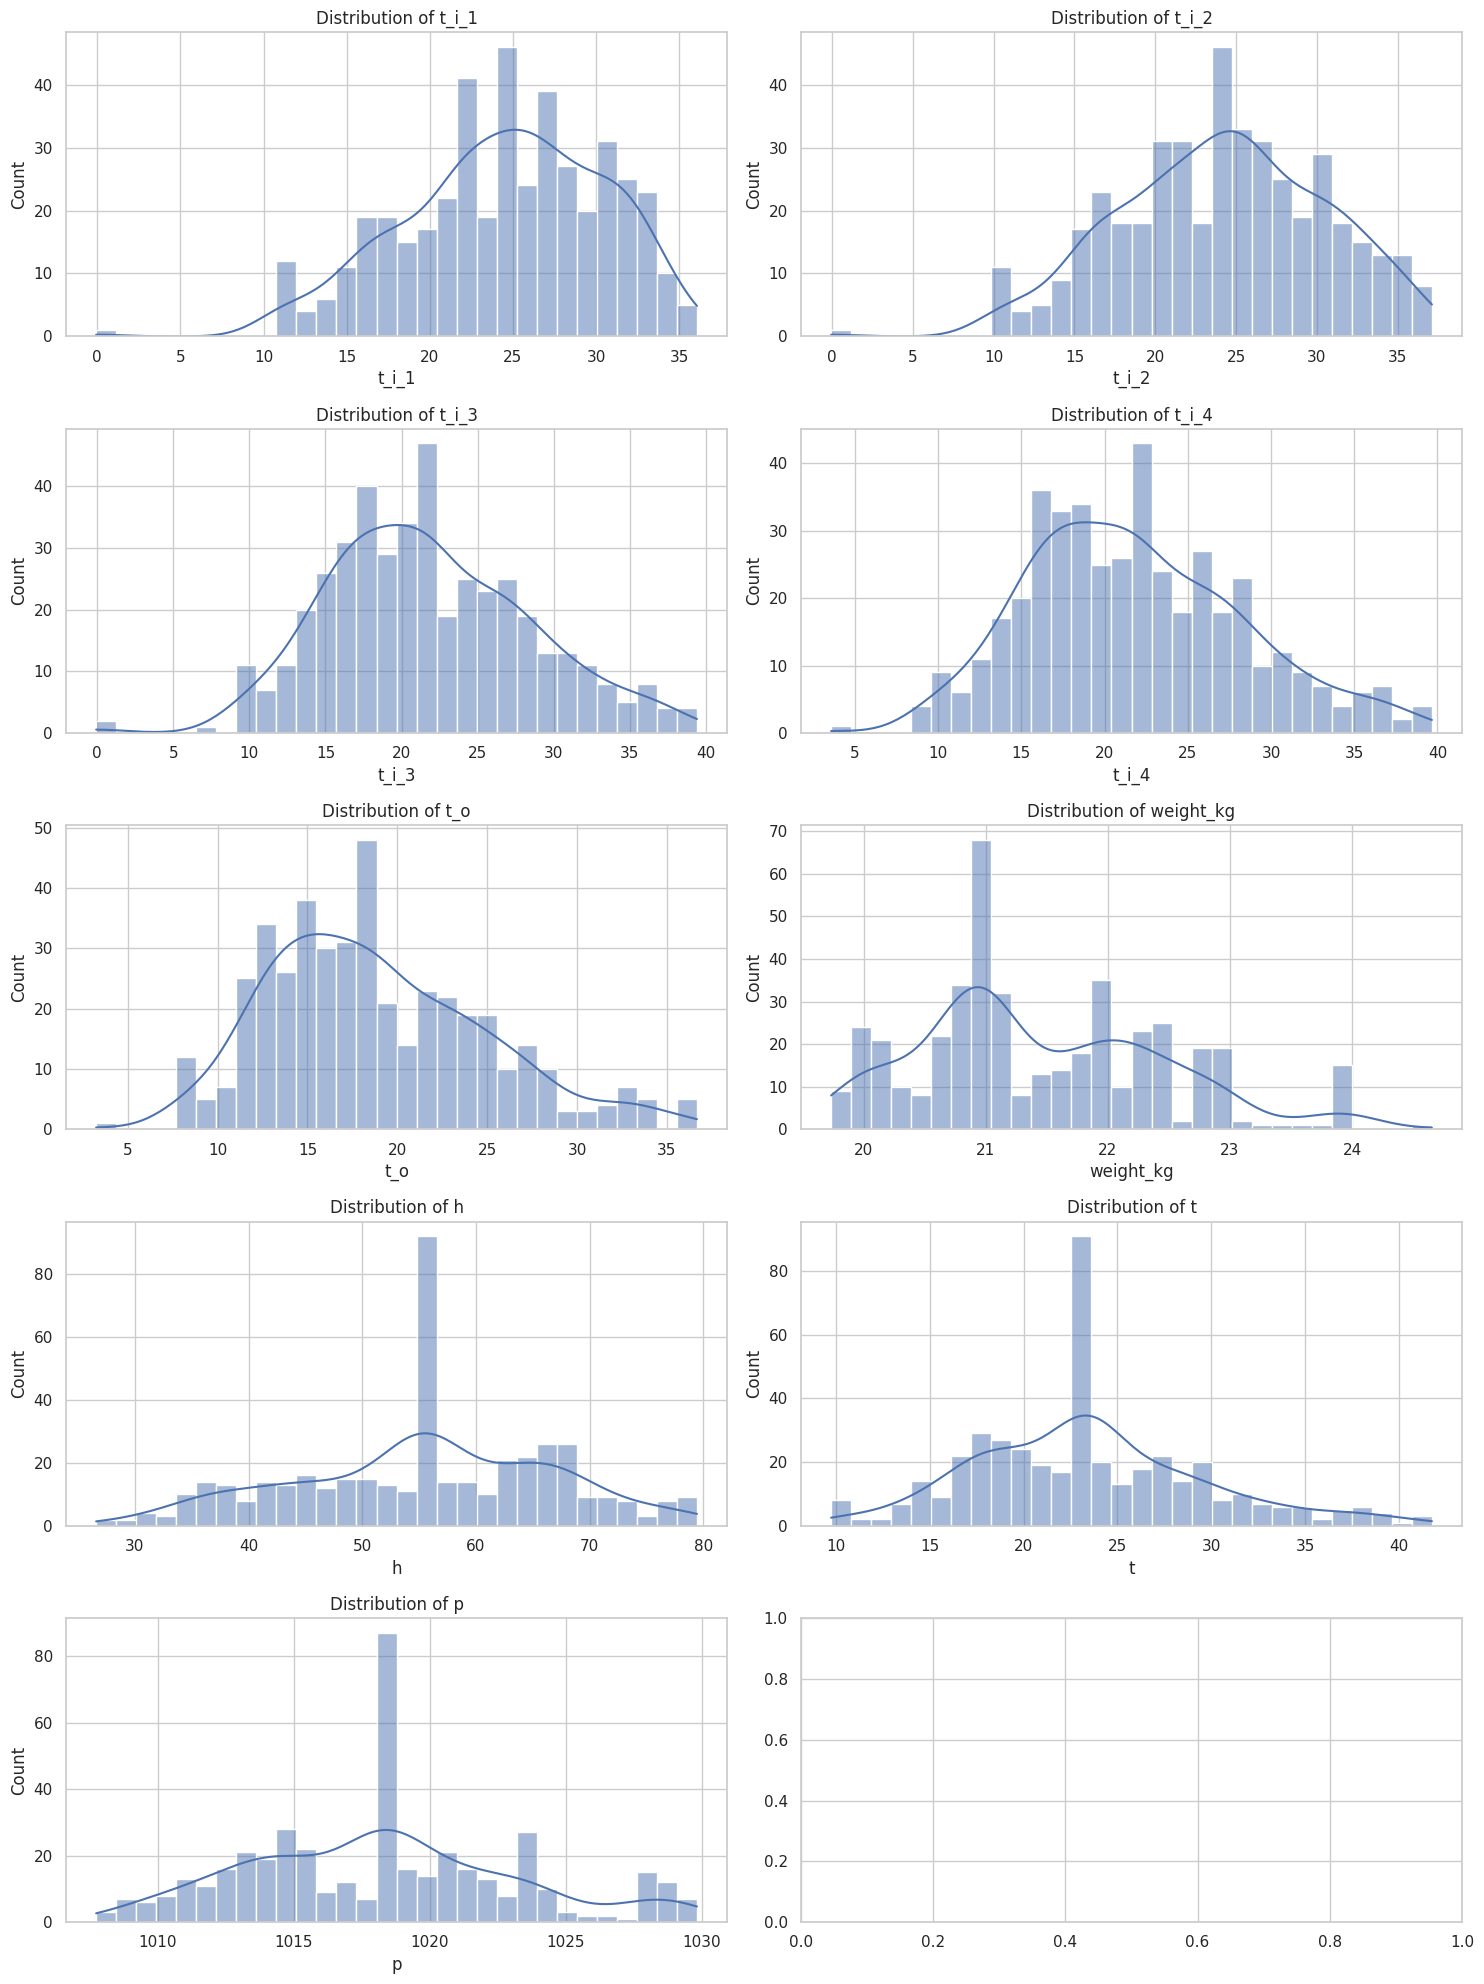

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot histograms for each relevant feature
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

for i, col in enumerate(data_relevant.columns):
    sns.histplot(data_relevant[col], bins=30, kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


#Data Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the relevant data
data_normalized = scaler.fit_transform(data_relevant)

# Convert the normalized data back to a DataFrame for easier handling
data_normalized_df = pd.DataFrame(data_normalized, columns=data_relevant.columns)

# Display the first few rows of the normalized data
print(data_normalized_df.head())


      t_i_1     t_i_2     t_i_3     t_i_4       t_o  weight_kg         h  \
0  1.017110  1.040828  0.955336  0.943825  0.778465   0.357823 -0.922904   
1  0.997752  1.032100  0.840336  0.836188  0.486352   0.374877 -0.957414   
2  1.005808  1.043380  0.733209  0.732950  0.298121   0.374271 -0.730979   
3  0.942678  0.980886  0.598444  0.565467  0.089480   0.371940 -0.578603   
4  0.839883  0.876070  0.443360  0.393590 -0.022773   0.370577 -0.522005   

          t         p  
0  0.895629  0.656987  
1  0.683863  0.683830  
2  0.492967  0.706656  
3  0.296353  0.724163  
4  0.112109  0.700523  


#DBscan Clustering

In [ ]:
from sklearn.cluster import DBSCAN

# Initialize DBSCAN with chosen parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit DBSCAN on the normalized data
data_normalized_df['cluster'] = dbscan.fit_predict(data_normalized_df)

# Display the clustering results
print(data_normalized_df['cluster'].value_counts())


cluster
-1     196
 26     23
 24     18
 4      18
 5      14
 6      14
 9      14
 14     12
 11     11
 17     11
 22      9
 21      8
 2       7
 1       6
 16      6
 19      6
 18      6
 13      6
 7       6
 15      5
 0       5
 10      5
 8       5
 20      5
 25      5
 23      5
 3       5
 12      5
Name: count, dtype: int64


#Evaluation and Visualization

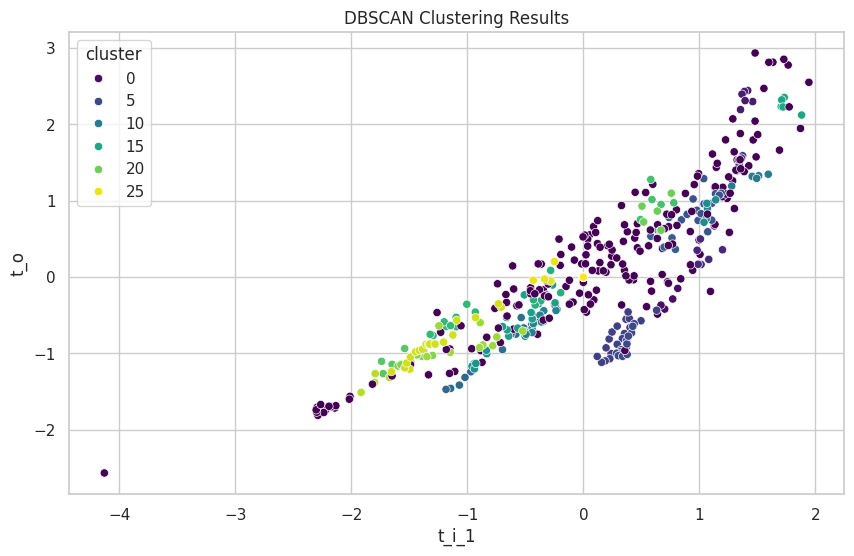

Number of anomalies detected:  196
        t_i_1     t_i_2     t_i_3     t_i_4       t_o  weight_kg  \
0    1.017110  1.040828  0.955336  0.943825  0.778465   0.357823   
1    0.997752  1.032100  0.840336  0.836188  0.486352   0.374877   
2    1.005808  1.043380  0.733209  0.732950  0.298121   0.374271   
3    0.942678  0.980886  0.598444  0.565467  0.089480   0.371940   
4    0.839883  0.876070  0.443360  0.393590 -0.022773   0.370577   
..        ...       ...       ...       ...       ...        ...   
408 -0.002346  0.027909  0.304313  0.297384  0.526914  -0.374870   
409  0.223994  0.237705  0.503151  0.495949  0.430869  -0.508610   
410  0.144578  0.153885  0.411517  0.396307  0.391765  -0.618565   
411 -0.609129 -0.560148 -0.236849  0.159866  0.146850  -1.525899   
412 -4.128385 -3.825335 -3.265827 -2.795391 -2.566674   3.205377   

                h         t             p  cluster  
0   -9.229036e-01  0.895629  6.569869e-01       -1  
1   -9.574137e-01  0.683863  6.838299e-01 

In [ ]:
# Plot the results of DBSCAN clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_normalized_df, x='t_i_1', y='t_o', hue='cluster', palette='viridis')
plt.title('DBSCAN Clustering Results')
plt.show()

# Identify anomalies
anomalies = data_normalized_df[data_normalized_df['cluster'] == -1]
print("Number of anomalies detected: ", len(anomalies))
print(anomalies)


<Figure size 1200x800 with 0 Axes>

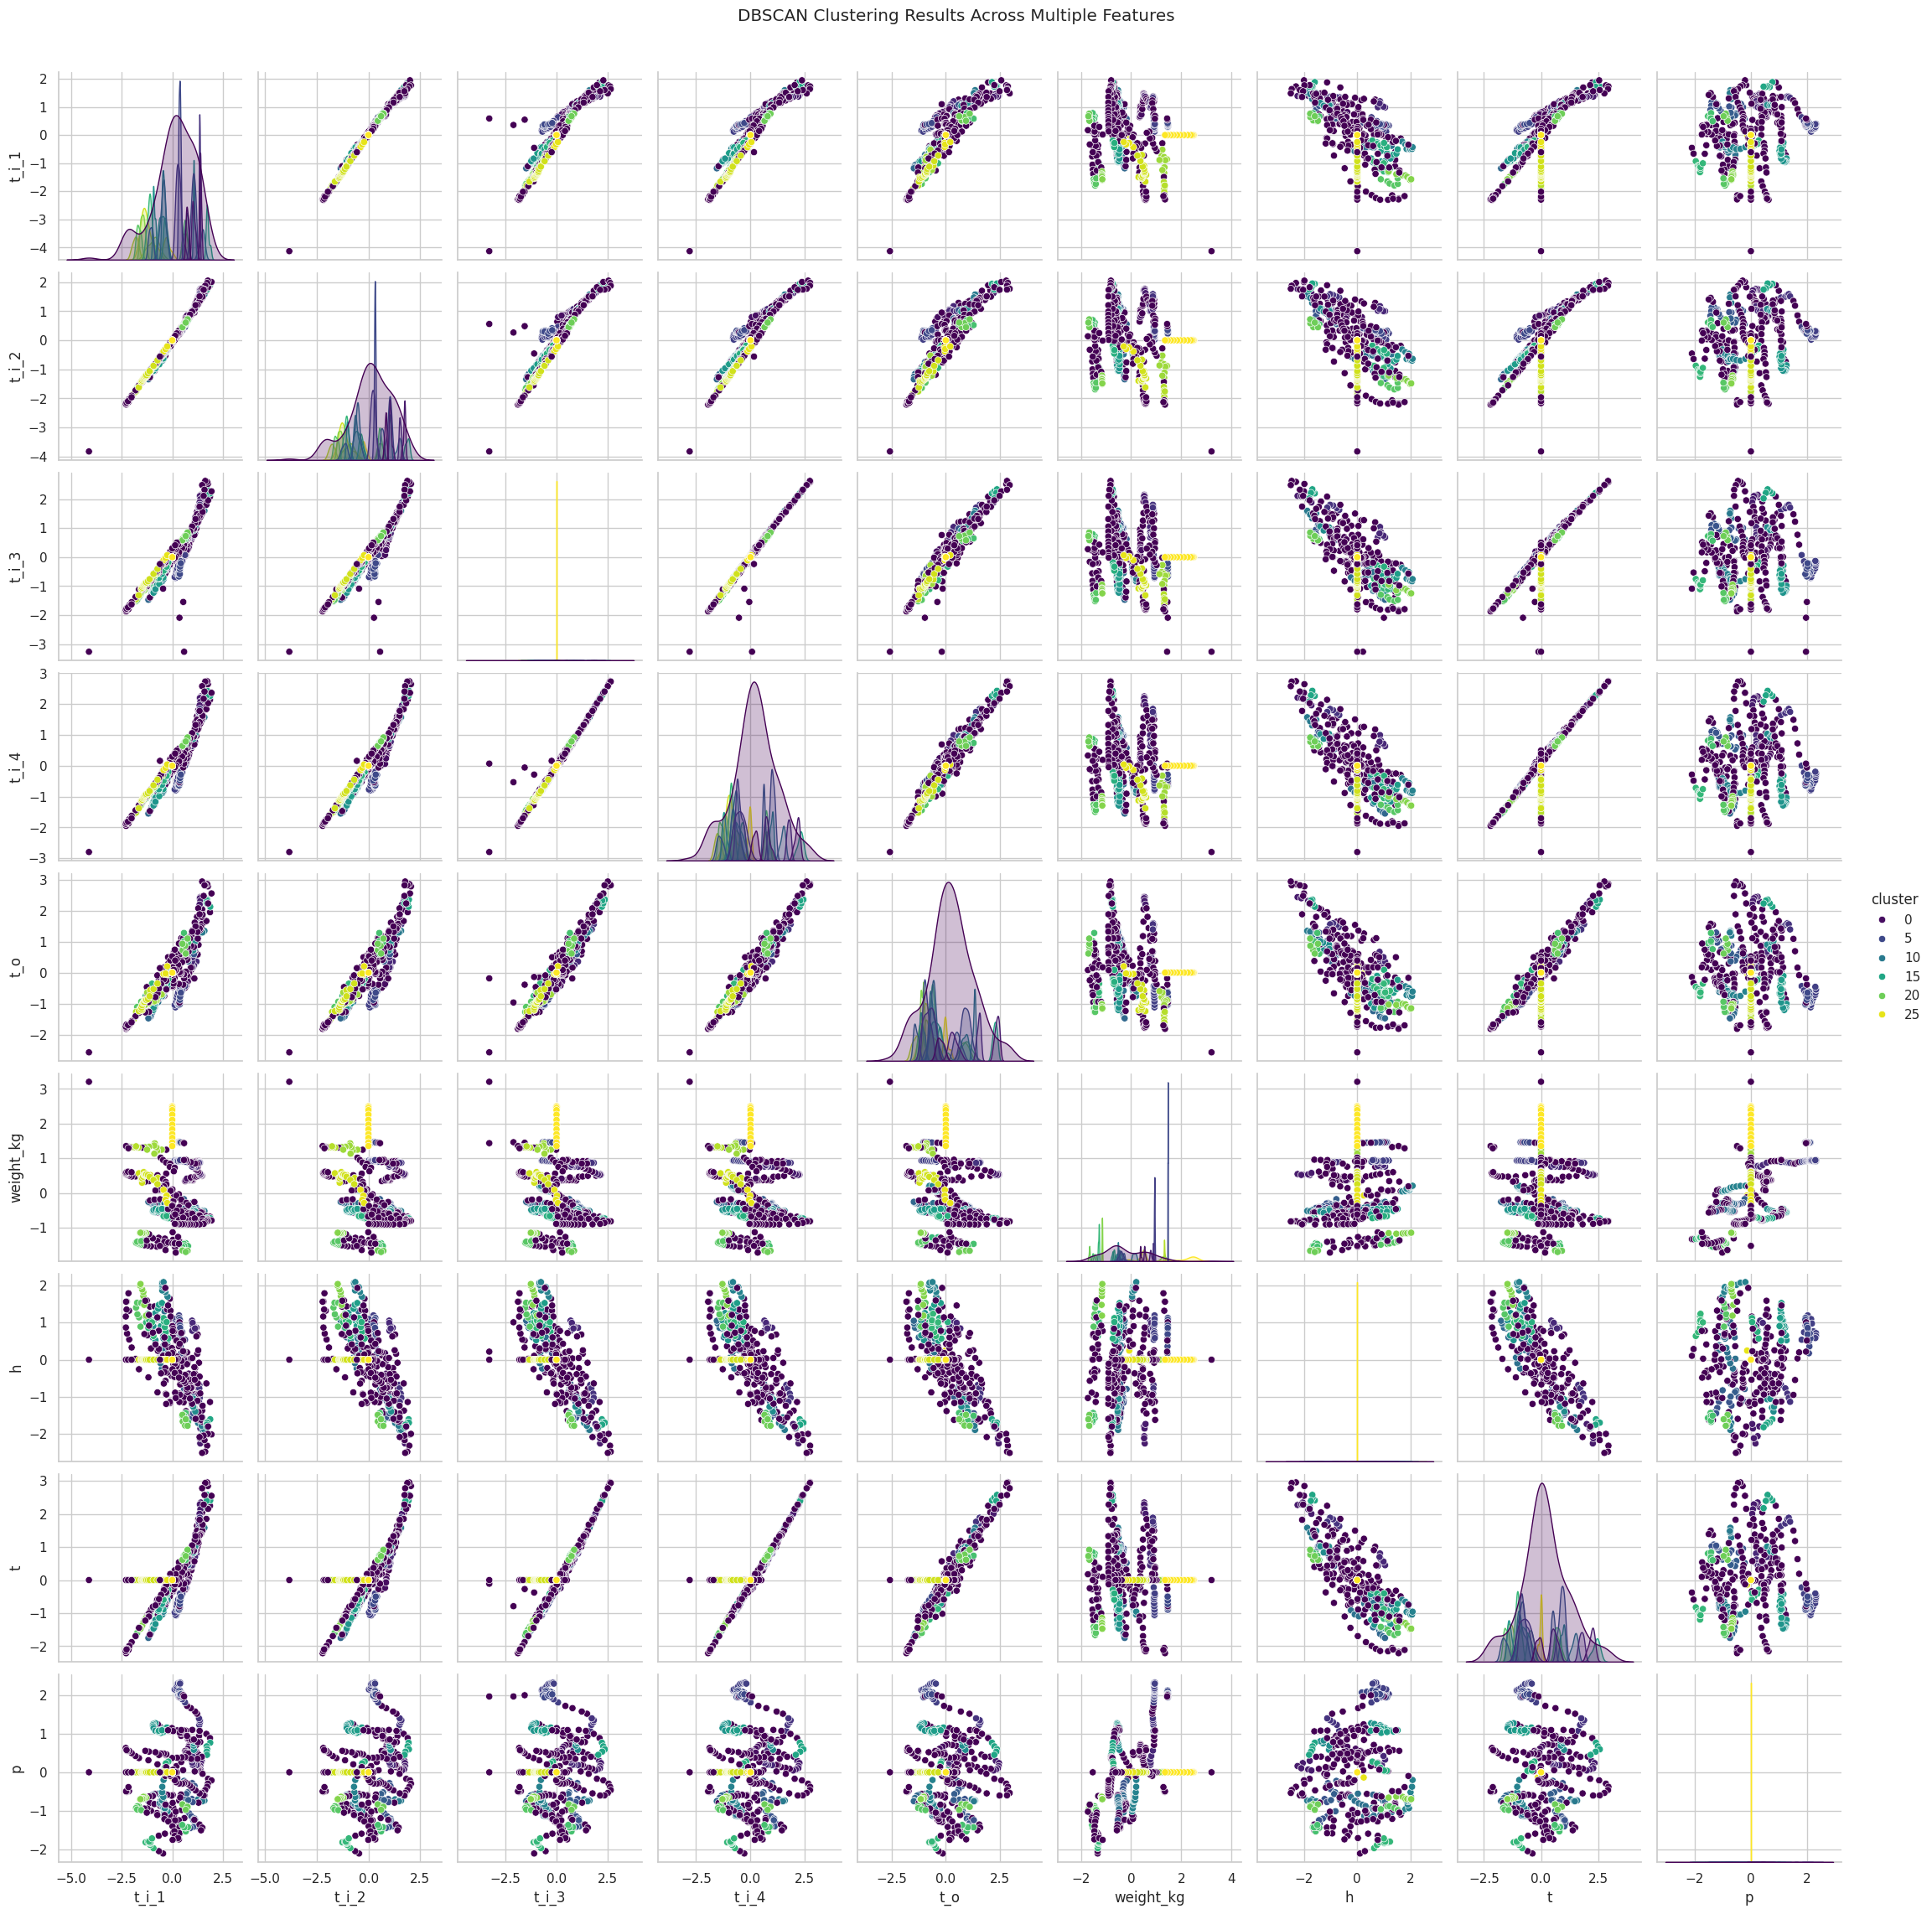

In [ ]:
# Using pairplot to visualize the clusters and anomalies across multiple features
plt.figure(figsize=(12, 8))
sns.pairplot(data=data_normalized_df, hue='cluster', palette='viridis', diag_kind='kde')
plt.suptitle('DBSCAN Clustering Results Across Multiple Features', y=1.02)
plt.show()


<Figure size 1200x800 with 0 Axes>

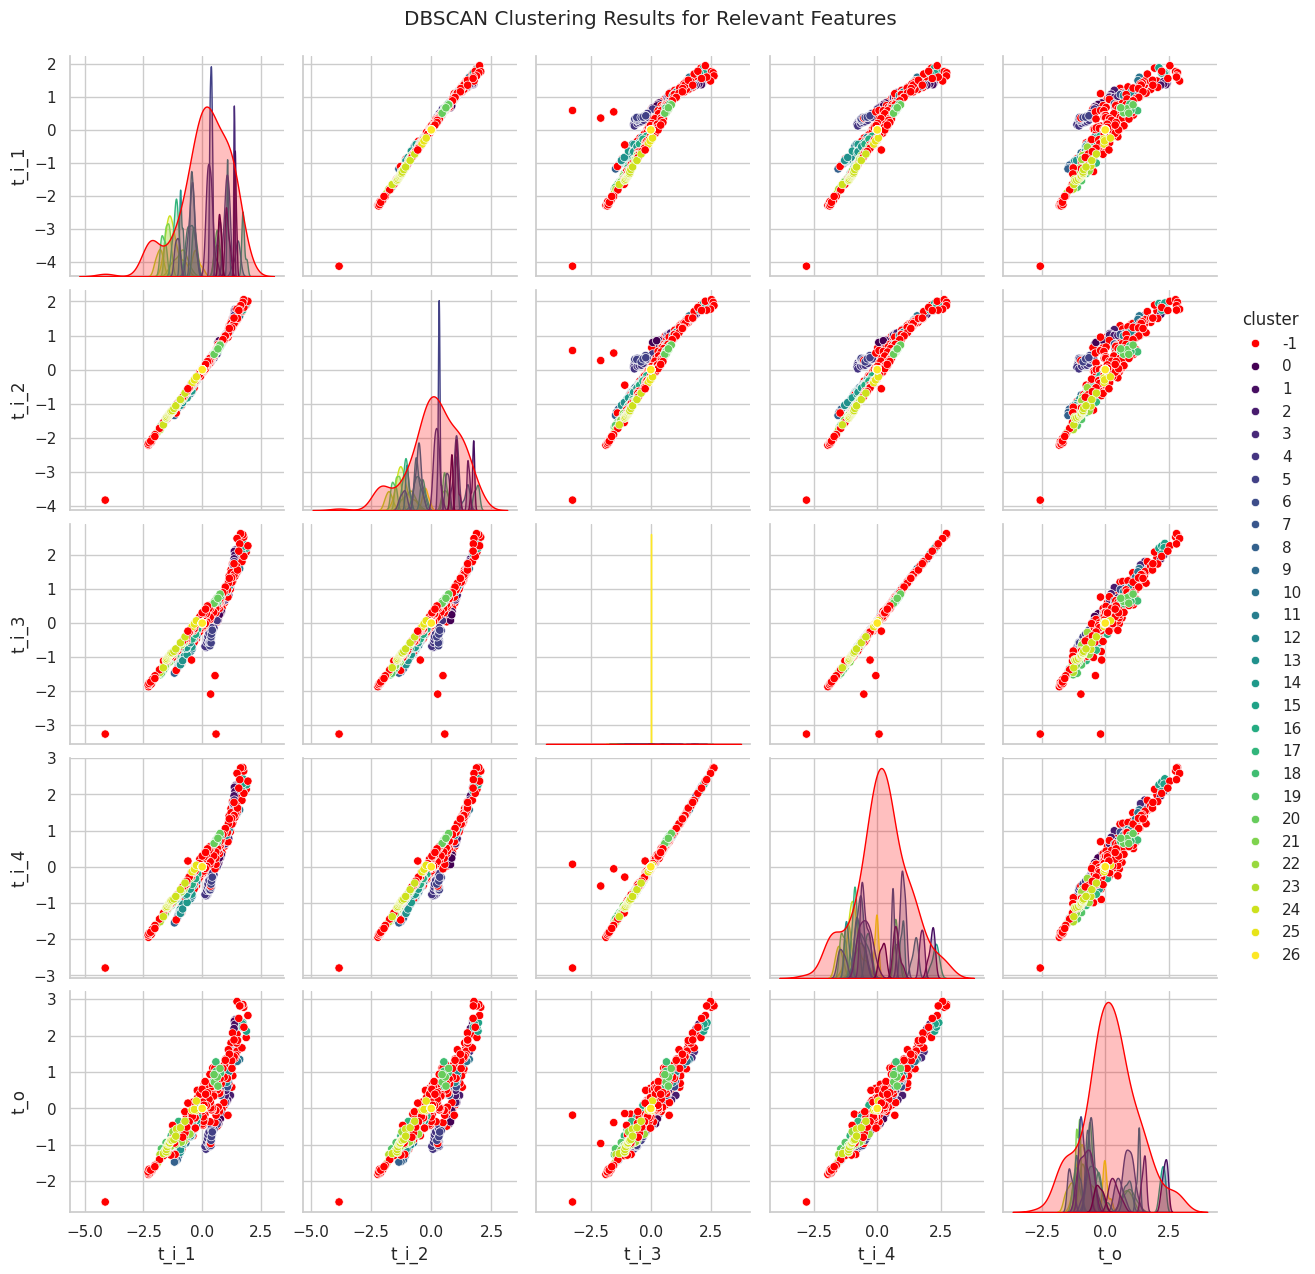

In [ ]:
import matplotlib.cm as cm

# Selecting only the relevant features
relevant_features = ['t_i_1', 't_i_2', 't_i_3', 't_i_4', 't_o']

# Get unique cluster labels from the dataset
cluster_labels = data_normalized_df['cluster'].unique()

# Generate a color palette mapping each cluster label to a color
# Red for anomalies (cluster -1) and viridis colormap for other clusters
palette = {-1: 'red'}
for label in cluster_labels:
    if label != -1:
        palette[label] = cm.viridis(label / max(cluster_labels))  # Normalize label for colormap

# Plot the results of DBSCAN clustering for the relevant features
plt.figure(figsize=(12, 8))
sns.pairplot(data=data_normalized_df[relevant_features + ['cluster']], hue='cluster', palette=palette, diag_kind='kde')
plt.suptitle('DBSCAN Clustering Results for Relevant Features', y=1.02)
plt.show()
